# Import modules

In [1]:
#!/usr/bin/pythonpy
################################################################################
# PYTHON's MODULAE
# ------------------------------------------------------------------------------
################################################################################
import os
import sys
module_path = os.path.abspath(os.path.join('/lib/python3.8/site-packages'))
if module_path not in sys.path:
    sys.path.append(module_path)

import fortran_integral
import fortran_quad
import numpy as np
from numpy import sqrt as sqrt
from numpy import pi as pi

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.colorbar as colorb
import pickle 
import datetime
from matplotlib import colors

# Total cross sections
import models.sigma0_xsections as sig0
import models.general_parameters as gp
import models.relic_density_calc as ohm
import models.radiative_factorization as hp
import models.pdf_integration as qcd
import lhapdf  


#################################################
today = datetime.date.today().strftime('%Y-%m-%d')


## Some configurations

sigmaz = {}
## Geral parameters
brn = gp.brn
gr0 = gp.gr0
gl0 = gp.gl0
grx0 = gp.grx0 
glx0 = gp.glx0
gx0 = gp.gx0

dmnames = sig0.dmnames
smax = gp.smax
me = gp.mvec[0]

Mmed = gp.Mmed  # TeV
mx  = gp.mx #  0.80 * Mmed/2  DM mass [TeV]
Nf_ee = gp.Nf_ee 
Nf_qq = gp.Nf_qq


---
---
## coupling ee - ISR

In [7]:
#vetorial: gl = gr  ## axial: gl = -gr ## chiral: gl = 0

# Read the previous saved file
binsize = 100
sigmaz_file = open(f'../myruns/sigmaz_ee_coupling_ISR_binsize1e-3_Nfermions{Nf_ee}_v2.pkl', 'rb')
sigmaz = pickle.load(sigmaz_file)
sigmaz_file.close()

gr = np.arange(1E-3, 1.001, 1/binsize) # right SM/DM coupling
gx = np.arange(1E-3, 1.001, 1/binsize) # DM coupling

# Define a grid
gr_grid, gx_grid = np.meshgrid(gx, gr) 




## Vector 
vec_binsize = 25
binsize = vec_binsize
## storage \sigma grid in z
smax = 3**2
gr = np.arange(1E-3, 1.001, 1/binsize) # right SM/DM coupling
gx = np.arange(1E-3, 1.001, 1/binsize) # DM coupling

#gr = np.linspace(0.001, 1, binsize) # right SM/DM coupling
#gx = np.linspace(0.001, 1, binsize) # DM coupling

# Define a grid
gr_grid, gx_grid = np.meshgrid(gr, gx) 


#vetorial: gl = gr  ## axial: gl = -gr ## chiral: gl = 0
#sigmaz = {}
row = 0
dmlst = ['Vector']
while row < 9:
    for fignumber, dmname in enumerate(dmlst):
        print(f'row {row}')
        # if dmname != 'Vector':
        #     continue
        @np.vectorize
        def sigmap(s, mq, Mmed, mx, gr, gl, gx):
            sigmatot =  hp.HPhsig(s, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0) 
            return sigmatot 

        if row == 0: #vetorial
            sigmaz[f'{dmname}_{row}'] = sigmap(smax, me, Mmed, mx, gr_grid, gr_grid, gx_grid)
            sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)
        elif row == 3: # axial
            sigmaz[f'{dmname}_{row}'] = sigmap(smax, me, Mmed, mx, gr_grid, -gr_grid, gx_grid)
            sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)
        else: # chiral
            sigmaz[f'{dmname}_{row}'] = sigmap(smax, me, Mmed, mx, gr_grid, 0, gx_grid)
            sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)
        print(f'Done coupling {dmname}')
    row += 3

row 0


/tmp/ipykernel_9727/413155692.py:58: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)


Done coupling Vector
row 3


/tmp/ipykernel_9727/413155692.py:61: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)


Done coupling Vector
row 6
Done coupling Vector


/tmp/ipykernel_9727/413155692.py:64: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)


Pasta 2023-10-18 já existe.
0
0
1
1
2
2
3
3
3
4
4
5
5
6
6
6
7
7
8
8
9


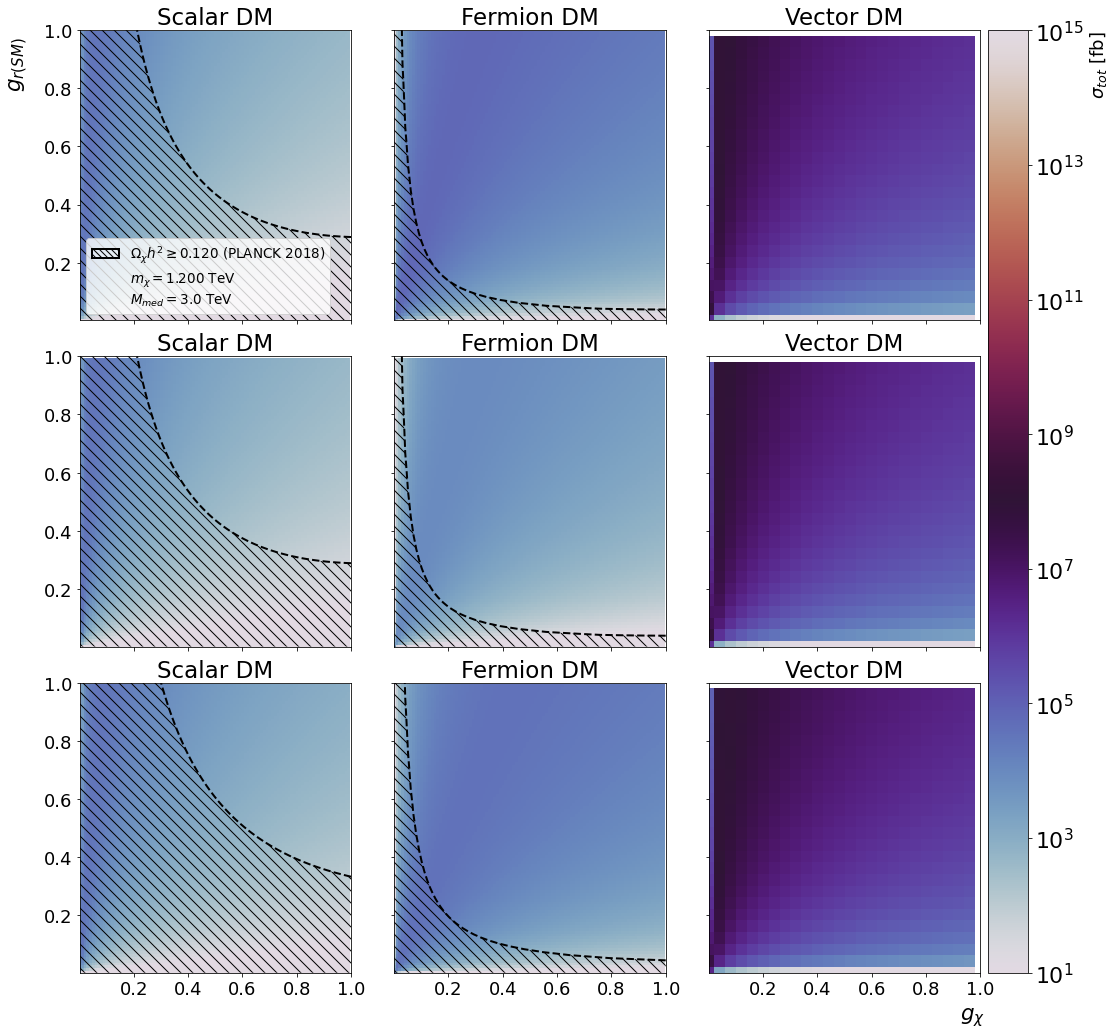

In [8]:
#vetorial: gl = gr  ## axial: gl = -gr ## chiral: gl = 0
#vmin=1E0, vmax=1E12
today = datetime.date.today().strftime('%Y-%m-%d')
# Verificar se a pasta já existe
if not os.path.exists(f'../figures/{today}'):
    # Se não existir, cria a pasta com a data de hoje
    os.makedirs(f'../figures/{today}')
    print(f'Pasta {today} criada com sucesso.')
else:
    print(f'Pasta {today} já existe.')


row = 0
fignumber = 0
auxLabel = 'oficial'
while row < 9:
    for f, dmname in enumerate(sig0.dmnames):
        
        binsize = vec_binsize if dmname == 'Vector' else 100

        gr = np.arange(1E-3, 1.001, 1/binsize) # right SM/DM coupling
        gx = np.arange(1E-3, 1.001, 1/binsize) # DM coupling

        #gr = np.linspace(0.001, 1, binsize) # right SM/DM coupling
        #gx = np.linspace(0.001, 1, binsize) # DM coupling

        # Define a grid
        gr_grid, gx_grid = np.meshgrid(gr, gx) 
        
        
        
        
        
        
        #fig = plt.figure(fignumber)
        auxLabel = auxLabel
        
        
        # Set up figure and image grid  
        if fignumber == 0:
            fig = plt.figure(figsize=(17, 17))
            ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(3,3),
                axes_pad=(0.6, 0.5),
                share_all=True,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.10,
                aspect=False
                )
            fsize = 18 
        
        #sig0funcs = SFV(dmname).sig0
        #sighat = RadFact(sig0funcs).HPh_hsig
        #sigmamap = Intxgamma(sighat)

        im = ax[fignumber].pcolormesh(gr_grid, gx_grid, sigmaz[f'{dmname}_{row}']*brn, norm=colors.LogNorm(vmin=1E1, vmax=1E15), cmap='twilight', rasterized=True) ## heat map of xsec
        
        ax[fignumber].set_ylim(0.001, 1) ## plot 'resolution'
        ax[fignumber].set_xlim(0.001, 1) ## plot 'resolution'
        #ax[fignumber].set_xscale('log') ## plot 'resolution'
        #ax[fignumber].set_yscale('log') ## plot 'resolution'

        # Colorbar
        ax[fignumber].cax.cla()
        cb = colorb.Colorbar(ax[fignumber].cax, im, )
        ax[fignumber].cax.toggle_label(True)
        cb.solids.set_rasterized(True)
        cb.set_label(r'$\sigma_{tot}$ [fb]', fontsize = fsize, loc='top')  ## color bar label 
        cb.ax.tick_params(labelsize=fsize+4)


        fig.set_dpi(72)



        #countour_relic = ax[fignumber].contourf(gr_grid, gx_grid, OHM_relic(sigmaz, mx, 0), planckdata2[0], colors='none', hatches=['\\\\'])
        #countour_relic_line = ax[fignumber].contour(gr_grid, gx_grid, OHM_relic(sigmaz, mx, 0), planckdata1, colors='k', linewidths=2, linestyles='dashed', rasterized=True)
        #labelOHM = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)'
            

        x1, y1 =  [gr[0], 1], [gx[0], 1]
        #ab, = ax[fignumber].plot(x1, y1, linewidth=3, color='grey', linestyle='solid', label=r'${g_r} = {g_\chi}$')
        lb, = ax[fignumber].plot(0.2, 0.2, linewidth=0, color=None, label=r'$m_{\chi} = %1.3f$ TeV' '\n' r'$M_{med} = %1.1f$ TeV' %(mx, Mmed))

        textstr = '\n'.join((
        r'$m_{\chi}=%1.3f$ TeV' % (mx, ),
        r'$M_{med} = %1.1f$ TeV' %(Mmed, )))


        ## Plot Labels ##
        if fignumber == 0:
            #ab, = plt.plot(x1, y1, linewidth=3, color='grey', linestyle='solid', label=r'${g_r} = {g_\chi}$')
            ac, = plt.plot([], [], label=textstr, color = 'None')

        # DM subplot names
        ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize+5)
        #ax[1].set_title('Fermion DM', fontsize = fsize+5)
        #ax[2].set_title('Vector DM', fontsize = fsize+5)


        ax[fignumber].tick_params(axis="x", labelsize=fsize)
        ax[fignumber].tick_params(axis="y", labelsize=fsize)


        ####################### RELIC DENSITY CONTOUR  #######################################
        # ######################################################################################
        binsize_ohm = 100

        omega_file = open(f'../myruns/omegarelic_ee_coupling_bin{binsize_ohm}_Nfermions{Nf_ee}_v2.pkl', 'rb')
        omegarelic_coup = pickle.load(omega_file)
        omega_file.close()
        
        DMlist = dmnames

        ## storage \sigma grid in z
        Mmed = 3.0  # mediator mass [TeV]
        mx = (Mmed/2)*0.90 # DM mass [TeV]

        #gr_ohm = np.arange(1E-3, 1.001, 1/binsize) # right SM/DM coupling
        #gx_ohm = np.arange(1E-3, 1.001, 1/binsize) # DM coupling


        gr_ohm =  np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling
        gx_ohm = np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling
        # Define a grid
        gr_grid_ohm, gx_grid_ohm = np.meshgrid(gr_ohm, gx_ohm) 


        #ax[fignumber].axvline(x = 2.0, color='lightskyblue', linestyle='--', label='CMS/ATLAS')
        countour_relic = ax[fignumber].contourf(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], ohm.planckdata2[0], colors='none', hatches=['\\\\'])
        countour_relic_line = ax[fignumber].contour(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed')
        labelOHM = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)'

        # ######################################################################################
        # ######################################################################################
        # ######################################################################################


        # # ### FORMAÇÃO DA LEGENDA (PERFEITA)
        #plt.subplots_adjust(right=0.76)
        artists1, labels1 = countour_relic.legend_elements()
        labels1[0] = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)' 
        current_handles, current_labels = plt.gca().get_legend_handles_labels()
        artists1.extend(current_handles)
        labels1.extend(current_labels)
        artists1[0]._hatch = "\\\\\\\ "
        #artists1[0].xy = [x00, y00]
        artists1[0]._linestyle = 'dashed'
        artists1[0]._dashes = True
        artists1[0]._linewidth = 2.0
        artists1[0]._edgecolor = (0.0, 0.0, 0.0, 1.0)
        LEG =  ax[0].legend(artists1, labels1, loc='lower left', fontsize = fsize-4.5)





        #get the extent of the largest box containing all the axes/subplots
        if fignumber == 8:
            extents = np.array([a.get_position().extents for a in ax])  #all axes extents
            bigextents = np.empty(4)   
            bigextents[:2] = extents[:,:2].min(axis=0)
            bigextents[2:] = extents[:,2:].max(axis=0)

            #text to mimic the x and y label. The text is positioned in the middle 
            labelpad=0.02  #distance between the external axis and the text
            xlab_t = fig.text(bigextents[2]-0.035, bigextents[1]-0.045, r'$g_{\chi}$',
                horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
            ylab_t = fig.text( bigextents[0]*0.6, bigextents[0]*7, r'$g_{r(SM)}$',
                rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)
            
           

        if fignumber == 8:
            
      
            #fig.tight_layout()
            #plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
            fig.set_dpi(72)
            fig.savefig(f'../figures/{today}/coupling_ee_ISR.pdf', dpi=72, bbox_inches = "tight")
                
            ## Plot Labels ##
            plt.title(r''+dmname+' DM production, $e^{+} e^{-} \to Z^{\prime} \to \chi \bar \chi$ '+auxLabel +'', fontsize = 20, loc = 'right')
            plt.ylabel(r'Dark Z^{\prime} coupling, $g_{\chi}$', fontsize = 20, loc='top')
            plt.xlabel(r'$SM Z^{\prime} coupling, g_r$', fontsize = 20, loc = 'right')
            plt.tick_params(axis="x", labelsize=20)
            plt.tick_params(axis="y", labelsize=20)
        print(fignumber)
        print(fignumber)
        fignumber += 1
    row += 3    
    print(row)

### Relic coupling ee

In [9]:
binsize_ohm = 10
Nfermions = 6

###################################################
###################################################
DMlist = dmnames
## storage \sigma grid in z
Mmed = 3.0  # mediator mass [TeV]
mx = (Mmed/2)*0.80 # DM mass [TeV]
smax = Mmed**2

#gr = np.linspace(1E-3, 0.30, binsize) # right SM/DM coupling
#gx = np.linspace(1E-3, 0.30, binsize) # DM coupling


# gr = np.arange(1E-3, 1., 0.01) # right SM/DM coupling
# gx = np.arange(1E-3, 1., 0.01) # DM coupling

gr = np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling
gx = np.linspace(1E-3, 1, binsize_ohm) # DM coupling

# Define a grid
gr_grid, gx_grid = np.meshgrid(gr, gx) 




omegarelic_coup = {}
print('Doing coupling...')
row = 0
while row < 9:
    for fignumber, dmname in enumerate(DMlist):

        if row == 0: #vetorial
            omegarelic_coup[f'{dmname}_{row}'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, gr_grid, gx_grid, dmname)

        elif row == 3: # axial
            omegarelic_coup[f'{dmname}_{row}'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, -gr_grid, gx_grid, dmname)

        else: # chiral
            omegarelic_coup[f'{dmname}_{row}'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, 0, gx_grid, dmname)
        print(f'Done for {dmname}')
    row += 3



Doing coupling...
Done for Scalar
Done for Fermion
Done for Vector
Done for Scalar
Done for Fermion
Done for Vector
Done for Scalar
Done for Fermion
Done for Vector


Pasta 2023-10-18 já existe.


/tmp/ipykernel_9727/2482852799.py:70: UserWarning: The following kwargs were not used by contour: 'rasterized'
  countour_relic_line = ax[fignumber].contour(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed', rasterized=True)


0
1
2
3
3
4
5
6
6
7
8
9


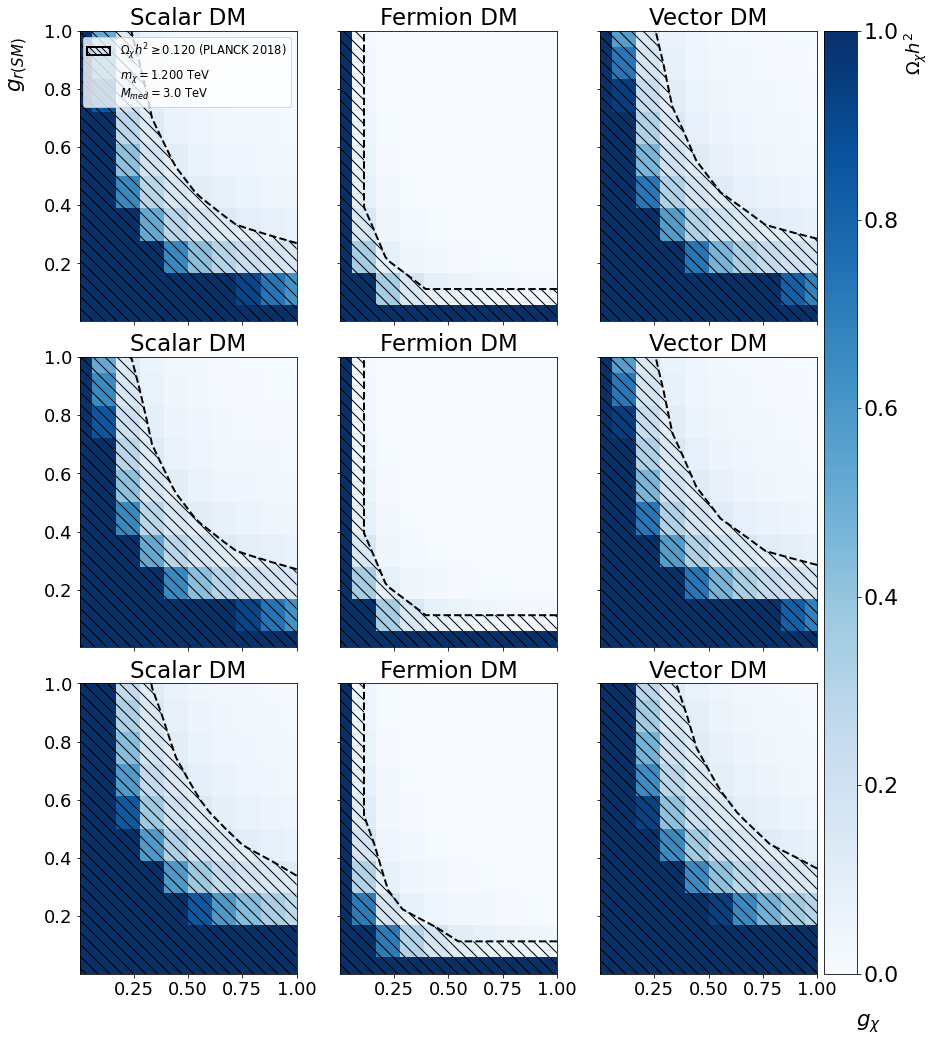

In [11]:
today = datetime.date.today().strftime('%Y-%m-%d')
# Verificar se a pasta já existe
if not os.path.exists(f'../figures/{today}'):
    # Se não existir, cria a pasta com a data de hoje
    os.makedirs(f'../figures/{today}')
    print(f'Pasta {today} criada com sucesso.')
else:
    print(f'Pasta {today} já existe.')

row = 0
fignumber = 0
auxLabel = 'oficial'


while row < 9:
    
    for f, dmname in enumerate(sig0.dmnames):


        binsize_ohm = 10
        Nfermions = 6

        ###################################################
        ###################################################
        DMlist = dmnames
        ## storage \sigma grid in z
        Mmed = 3.0  # mediator mass [TeV]
        mx = (Mmed/2)*0.80 # DM mass [TeV]
        smax = Mmed**2

        #gr = np.linspace(1E-3, 0.30, binsize) # right SM/DM coupling
        #gx = np.linspace(1E-3, 0.30, binsize) # DM coupling


        # gr = np.arange(1E-3, 1., 0.01) # right SM/DM coupling
        # gx = np.arange(1E-3, 1., 0.01) # DM coupling

        gr = np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling
        gx = np.linspace(1E-3, 1, binsize_ohm) # DM coupling

        # Define a grid
        gr_grid_ohm, gx_grid_ohm = np.meshgrid(gr, gx) 
        
        #fig = plt.figure(fignumber)
        auxLabel = auxLabel
        
        
        # Set up figure and image grid  
        if fignumber == 0:
            fig = plt.figure(figsize=(17, 17))
            ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(3,3),
                axes_pad=(0.6, 0.5),
                share_all=True,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.10,
                aspect=False
                )
            fsize = 18 
        
        #sig0funcs = SFV(dmname).sig0
        #sighat = RadFact(sig0funcs).HPh_hsig
        #sigmamap = Intxgamma(sighat)

        im = ax[fignumber].pcolormesh(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], vmin=0, vmax=1, cmap='Blues', rasterized=True) ## heat map of xsec
        
        countour_relic = ax[fignumber].contourf(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], ohm.planckdata2[0], colors='none', hatches=['\\\\'])
        countour_relic_line = ax[fignumber].contour(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed', rasterized=True)
        labelOHM = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)'


        ax[fignumber].set_ylim(1E-3, 1) ## plot 'resolution'
        ax[fignumber].set_xlim(1E-3, 1) ## plot 'resolution'
                

        # Colorbar
        ax[fignumber].cax.cla()
        cb = colorb.Colorbar(ax[fignumber].cax, im, )
        ax[fignumber].cax.toggle_label(True)
        cb.set_label(r'$\Omega_{\chi} h^2 $', fontsize = fsize, loc='top')  ## color bar label 
        cb.ax.tick_params(labelsize=fsize+4)


        fig.set_dpi(72)
            

        #x1, y1 =  [gr[0], 1], [gx[0], 1]
        #ab, = ax[fignumber].plot(x1, y1, linewidth=1, color='gray', linestyle='dashed', label=r'${g_r} = {g_\chi}$')
        lb, = ax[fignumber].plot(0.2, 0.2, linewidth=0, color=None, label=r'$m_{\chi} = %1.3f$ TeV' '\n' r'$M_{med} = %1.1f$ TeV' %(mx, Mmed))

        textstr = '\n'.join((
        r'$m_{\chi}=%1.3f$ TeV' % (mx, ),
        r'$M_{med} = %1.1f$ TeV' %(Mmed, )))
        #ax[fignumber].axvline(x = 2.0, color='lightskyblue', linestyle='--', label='CMS/ATLAS')

        ## Plot Labels ##
        if fignumber == 0:
            #ab, = plt.plot(x1, y1, linewidth=1, color='gray', linestyle='dashed', label=r'${g_r} = {g_\chi}$')
            ac, = plt.plot([], [], label=textstr, color = 'None')

        # DM subplot names
        ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize+5)


        ax[fignumber].tick_params(axis="x", labelsize=fsize)
        ax[fignumber].tick_params(axis="y", labelsize=fsize)


        ### FORMAÇÃO DA LEGENDA (PERFEITA)
        plt.subplots_adjust(right=0.76)
        artists1, labels1 = countour_relic.legend_elements()
        labels1[0] = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)' 
        current_handles, current_labels = plt.gca().get_legend_handles_labels()
        artists1.extend(current_handles)
        labels1.extend(current_labels)
        artists1[0]._hatch = "\\\\\\\ "
        #artists1[0].xy = [x00, y00]
        artists1[0]._linestyle = 'dashed'
        artists1[0]._dashes = True
        artists1[0]._linewidth = 2.0
        artists1[0]._edgecolor = (0.0, 0.0, 0.0, 1.0)
        LEG =  ax[0].legend(artists1, labels1, loc='upper right', fontsize = fsize-6.5)

        #ax[fignumber].set_ylim(0.001, 0.250) ## plot 'resolution'
        #ax[fignumber].set_xlim(0.001, 0.250) ## plot 'resolution'
        #ax[fignumber].set_xscale('log') ## plot 'resolution'
        #ax[fignumber].set_yscale('log') ## plot 'resolution'



        #get the extent of the largest box containing all the axes/subplots
        if fignumber == 8:
            extents = np.array([a.get_position().extents for a in ax])  #all axes extents
            bigextents = np.empty(4)   
            bigextents[:2] = extents[:,:2].min(axis=0)
            bigextents[2:] = extents[:,2:].max(axis=0)

            #text to mimic the x and y label. The text is positioned in the middle 
            labelpad=0.02  #distance between the external axis and the text
            xlab_t = fig.text(bigextents[2]-0.12, bigextents[1]-0.05, r'$g_{\chi}$',
                horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
            ylab_t = fig.text( bigextents[0]*0.6, bigextents[0]*7, r'$g_{r(SM)}$',
                rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)
            
            

        if fignumber == 8:
            
            #fig.tight_layout()
            #plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
            fig.set_dpi(72)
            fig.savefig(f'../figures/{today}/omega_relic_ee_blue_plot_coup.pdf', dpi=72, bbox_inches = "tight")
                
            ## Plot Labels ##
            plt.title(r''+dmname+' DM production, $e^{+} e^{-} \to Z^{\prime} \to \chi \bar \chi$ '+auxLabel +'', fontsize = 20, loc = 'right')
            plt.ylabel(r'Dark Z^{\prime} coupling, $g_{\chi}$', fontsize = 20, loc='top')
            plt.xlabel(r'$SM Z^{\prime} coupling, g_r$', fontsize = 20, loc = 'right')
            plt.tick_params(axis="x", labelsize=20)
            plt.tick_params(axis="y", labelsize=20)
        print(fignumber)
        fignumber += 1
    row += 3    
    print(row)

## coupling qq - ISR

In [3]:

    
binsize = 100
gr = np.arange(1E-3, 1.001, 1/binsize) # right SM/DM coupling
gx = np.arange(1E-3, 1.001, 1/binsize) # DM coupling

# Define a grid
gr_grid, gx_grid = np.meshgrid(gr, gx) 

sigmaz_file = open(f'../myruns/sigmaz_qq_coupling_ISR_1e-3_Nfermions{Nf_qq}_v2.pkl', 'rb')
sigmaz = pickle.load(sigmaz_file)
sigmaz_file.close()

#gr = np.arange(1E-3, 1.001, 1/binsize) # right SM/DM coupling
#gx = np.arange(1E-3, 1.001, 1/binsize) # DM coupling
binsize = 10

gr = np.arange(1E-3, 1.001, 1/binsize) # right SM/DM coupling
gx = np.arange(1E-3, 1.001, 1/binsize) # DM coupling
# Define a grid
gr_grid, gx_grid = np.meshgrid(gr, gx) 

#vetorial: gl = gr  ## axial: gl = -gr ## chiral: gl = 0

row = 0
while row < 9:
    for fignumber, dmname in enumerate(['Vector']):
        @np.vectorize
        def sigmap(s, mq, Mmed, mx, gr, gl, gx):
            sigmatot =  hp.HPhsig(s, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0) 
            return sigmatot 

        if row == 0: #vetorial
            sigmaz[f'{dmname}_{row}'] = sigmap(Mmed**2, me, Mmed, mx, gr_grid, gr_grid, gx_grid)
            sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)
        elif row == 3: # axial
            sigmaz[f'{dmname}_{row}'] = sigmap(Mmed**2, me, Mmed, mx, gr_grid, -gr_grid, gx_grid)
            sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)
        else: # chiral
            sigmaz[f'{dmname}_{row}'] = sigmap(Mmed**2, me, Mmed, mx, gr_grid, 0, gx_grid)
            sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)
        print(f'Done coupling {dmname}')
    row += 3


/tmp/ipykernel_10739/3114746238.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)


Done coupling Vector


/tmp/ipykernel_10739/3114746238.py:36: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)


Done coupling Vector
Done coupling Vector


/tmp/ipykernel_10739/3114746238.py:39: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sigmaz[f'{dmname}_{row}'] = np.array(list(sigmaz[f'{dmname}_{row}'][:, :]), dtype=np.float)


Pasta 2023-10-18 já existe.
0
1
2
3
3
4
5
6
6
7
8
9


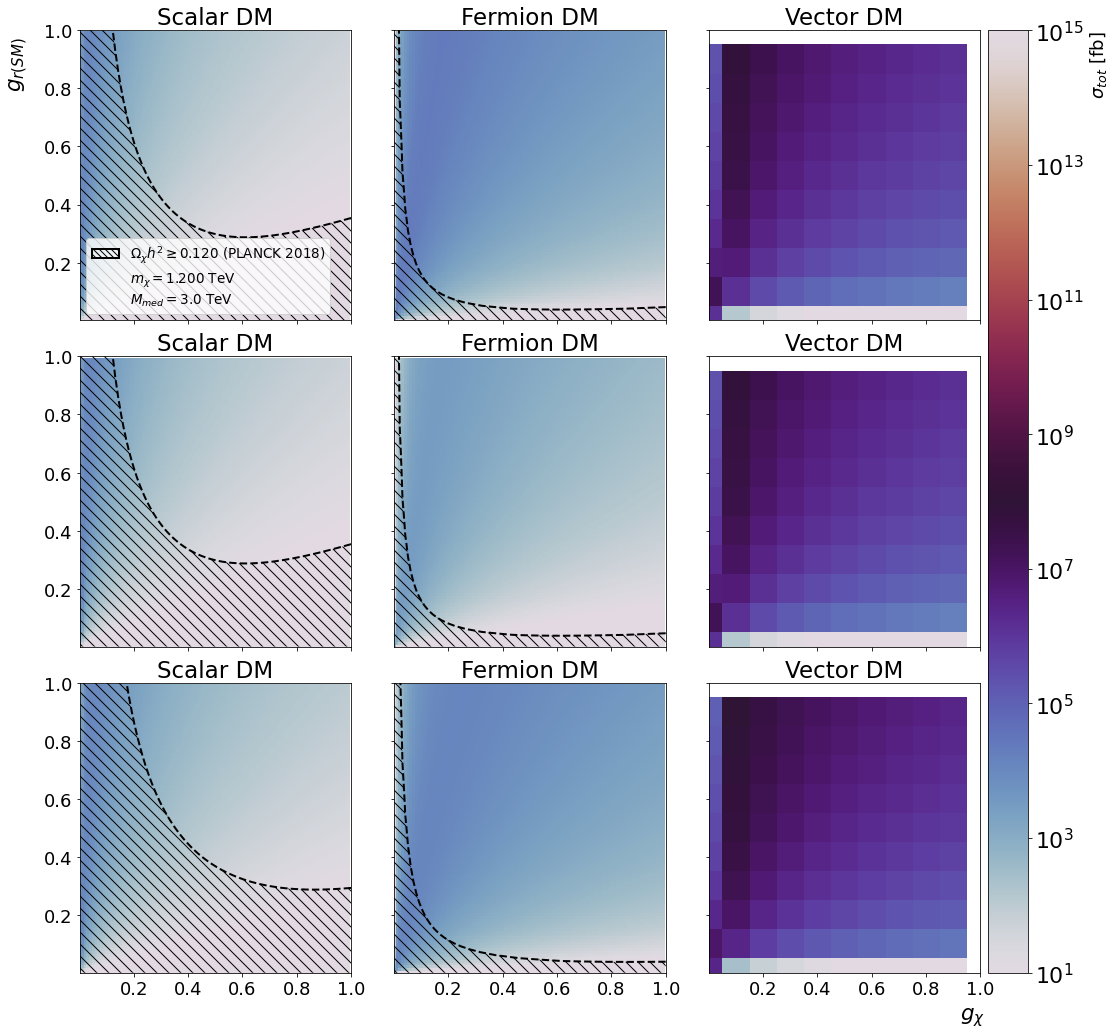

In [12]:
today = datetime.date.today().strftime('%Y-%m-%d')
# Verificar se a pasta já existe
if not os.path.exists(f'../figures/{today}'):
    # Se não existir, cria a pasta com a data de hoje
    os.makedirs(f'../figures/{today}')
    print(f'Pasta {today} criada com sucesso.')
else:
    print(f'Pasta {today} já existe.')

row = 0
fignumber = 0
auxLabel = 'oficial'

while row < 9:
    for f, dmname in enumerate(sig0.dmnames):

        binsize = 10 if dmname == 'Vector' else 100
        gr = np.arange(1E-3, 1.001, 1/binsize) # right SM/DM coupling
        gx = np.arange(1E-3, 1.001, 1/binsize) # DM coupling
        # Define a grid
        gr_grid, gx_grid = np.meshgrid(gr, gx) 


        # Set up figure and image grid  
        if fignumber == 0:
            fig = plt.figure(figsize=(17, 17))
            ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(3,3),
                axes_pad=(0.6, 0.5),
                share_all=True,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.10,
                aspect=False
                )
            fsize = 18 
        
        #sig0funcs = SFV(dmname).sig0
        #sighat = RadFact(sig0funcs).HPh_hsig
        #sigmamap = Intxgamma(sighat)

        im = ax[fignumber].pcolormesh(gr_grid, gx_grid, sigmaz[f'{dmname}_{row}']*brn, norm=colors.LogNorm(vmin=1E1, vmax=1E15), cmap='twilight', rasterized=True) ## heat map of xsec
        
        ax[fignumber].set_ylim(0.001, 1.0) ## plot 'resolution'
        ax[fignumber].set_xlim(0.001, 1.0) ## plot 'resolution'
        #ax[fignumber].set_xscale('log') ## plot 'resolution'
        #ax[fignumber].set_yscale('log') ## plot 'resolution'

        # Colorbar
        ax[fignumber].cax.cla()
        cb = colorb.Colorbar(ax[fignumber].cax, im, )
        ax[fignumber].cax.toggle_label(True)
        cb.solids.set_rasterized(True)
        cb.set_label(r'$\sigma_{tot}$ [fb]', fontsize = fsize, loc='top')  ## color bar label 
        cb.ax.tick_params(labelsize=fsize+4)

        fig.set_dpi(72)
        lb, = ax[fignumber].plot(0.2, 0.2, linewidth=0, color=None, label=r'$m_{\chi} = %1.3f$ TeV' '\n' r'$M_{med} = %1.1f$ TeV' %(mx, Mmed))

        textstr = '\n'.join((
        r'$m_{\chi}=%1.3f$ TeV' % (mx, ),
        r'$M_{med} = %1.1f$ TeV' %(Mmed, )))


        ## Plot Labels ##
        if fignumber == 0:
            #ab, = plt.plot(x1, y1, linewidth=1, color='gray', linestyle='dashed', label=r'${g_r} = {g_\chi}$')
            ac, = plt.plot([], [], label=textstr, color = 'None')

        # DM subplot names
        ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize+5)
        ax[fignumber].tick_params(axis="x", labelsize=fsize)
        ax[fignumber].tick_params(axis="y", labelsize=fsize)

        ####################### RELIC DENSITY CONTOUR  #######################################
        # ######################################################################################
        binsize_ohm = 100
        omega_file = open(f'../myruns/omegarelic_qq_coupling_bin{binsize_ohm}_Nfermions{Nf_qq}_v2.pkl', 'rb')
        omegarelic_coup = pickle.load(omega_file)
        omega_file.close()

        gr_ohm =  np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling
        gx_ohm = np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling
        # Define a grid
        gr_grid_ohm, gx_grid_ohm = np.meshgrid(gr_ohm, gx_ohm) 


        #ax[fignumber].axvline(x = 2.0, color='lightskyblue', linestyle='--', label='CMS/ATLAS')
        countour_relic = ax[fignumber].contourf(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], ohm.planckdata2[0], colors='none', hatches=['\\\\'])
        countour_relic_line = ax[fignumber].contour(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed')
        labelOHM = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)'

        # ######################################################################################
        # ######################################################################################
        # ######################################################################################


        # # ### FORMAÇÃO DA LEGENDA (PERFEITA)
        #plt.subplots_adjust(right=0.76)
        artists1, labels1 = countour_relic.legend_elements()
        labels1[0] = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)' 
        current_handles, current_labels = plt.gca().get_legend_handles_labels()
        artists1.extend(current_handles)
        labels1.extend(current_labels)
        artists1[0]._hatch = "\\\\\\\ "
        #artists1[0].xy = [x00, y00]
        artists1[0]._linestyle = 'dashed'
        artists1[0]._dashes = True
        artists1[0]._linewidth = 2.0
        artists1[0]._edgecolor = (0.0, 0.0, 0.0, 1.0)
        LEG =  ax[0].legend(artists1, labels1, loc='lower left', fontsize = fsize-4.5)





        #get the extent of the largest box containing all the axes/subplots
        if fignumber == 7:
            extents = np.array([a.get_position().extents for a in ax])  #all axes extents
            bigextents = np.empty(4)   
            bigextents[:2] = extents[:,:2].min(axis=0)
            bigextents[2:] = extents[:,2:].max(axis=0)

            #text to mimic the x and y label. The text is positioned in the middle 
            labelpad=0.02  #distance between the external axis and the text
            xlab_t = fig.text(bigextents[2]-0.035, bigextents[1]-0.045, r'$g_{\chi}$',
                horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
            ylab_t = fig.text( bigextents[0]*0.6, bigextents[0]*7, r'$g_{r(SM)}$',
                rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)
            
           

        if fignumber == 7:
            
      
            #fig.tight_layout()
            #plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
            fig.set_dpi(72)
            fig.savefig(f'../figures/{today}/coupling_qq_ISR.pdf', dpi=72, bbox_inches = "tight")
                
            ## Plot Labels ##
            plt.title(r''+dmname+' DM production, $e^{+} e^{-} \to Z^{\prime} \to \chi \bar \chi$ '+auxLabel +'', fontsize = 20, loc = 'right')
            plt.ylabel(r'Dark Z^{\prime} coupling, $g_{\chi}$', fontsize = 20, loc='top')
            plt.xlabel(r'$SM Z^{\prime} coupling, g_r$', fontsize = 20, loc = 'right')
            plt.tick_params(axis="x", labelsize=20)
            plt.tick_params(axis="y", labelsize=20)
        print(fignumber)
        fignumber += 1
    row += 3    
    print(row)


### Relic coupling qq

In [16]:



binsize = 100
omega_file = open(f'../myruns/omegarelic_qq_coupling_bin{binsize}_Nfermions{Nf_qq}_v2.pkl', 'rb')
omegarelic_coup = pickle.load(omega_file)
omega_file.close()

gr = np.linspace(1E-3, 1, binsize) # right SM/DM coupling
gx = np.linspace(1E-3, 1, binsize) # DM coupling
# Define a grid
gr_grid_ohm, gx_grid_ohm = np.meshgrid(gr_ohm, gx_ohm) 

###################################################

binsize = 10

gr = np.linspace(1E-3, 1, binsize) # right SM/DM coupling
gx = np.linspace(1E-3, 1, binsize) # DM coupling


# Define a grid
gr_grid, gx_grid = np.meshgrid(gr, gx) 
print('Doing coupling...')
row = 0
while row < 9:
    for fignumber, dmname in enumerate(['Vector']):

        if row == 0: #vetorial
            omegarelic_coup[f'{dmname}_{row}'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, gr_grid, gx_grid, dmname)

        elif row == 3: # axial
            omegarelic_coup[f'{dmname}_{row}'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, -gr_grid, gx_grid, dmname)

        else: # chiral
            omegarelic_coup[f'{dmname}_{row}'] = ohm.Ohm_numerical(smax, me, Mmed , mx, gr_grid, 0, gx_grid, dmname)
        print(f'Done for {dmname}')
    row += 3

Doing coupling...
Done for Vector
Done for Vector
Done for Vector


/tmp/ipykernel_9958/2638569059.py:39: UserWarning: The following kwargs were not used by contour: 'rasterized'
  countour_relic_line = ax[fignumber].contour(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed', rasterized=True)


0
1
2
3
3
4
5
6
6
7
8
9


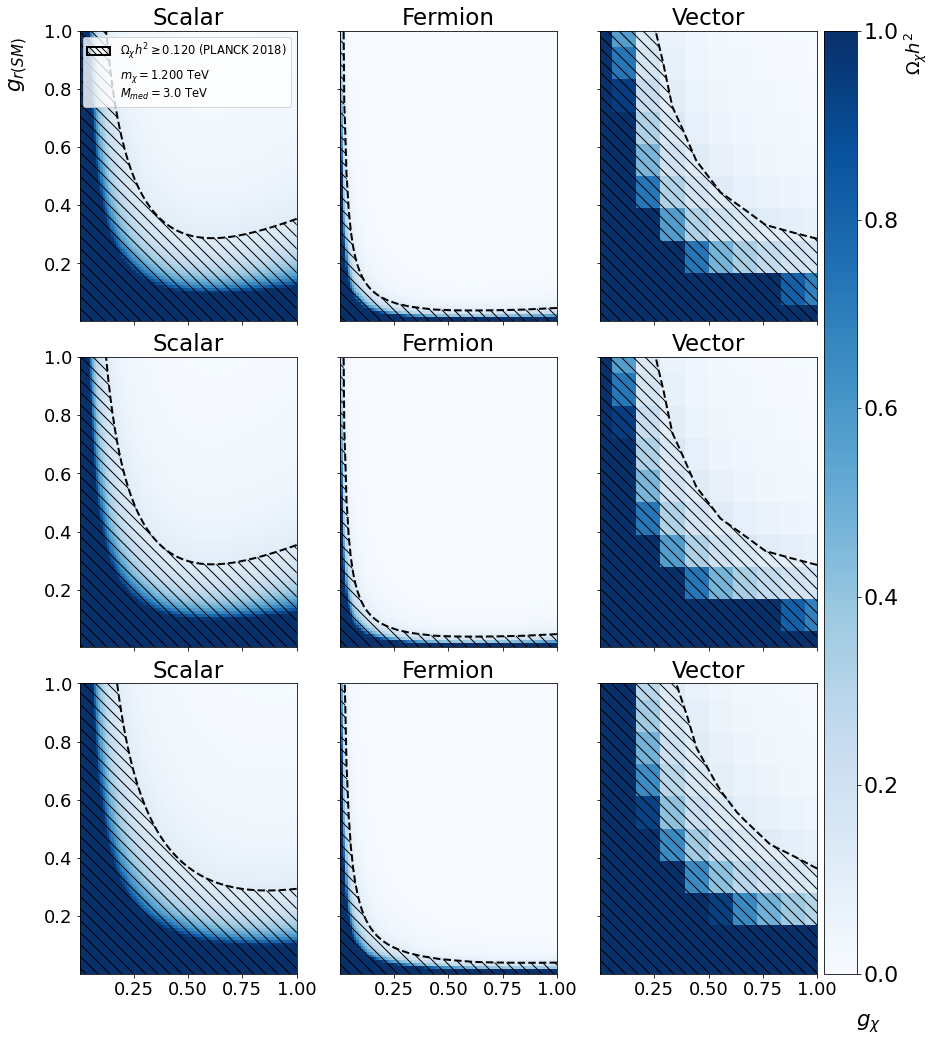

In [18]:
row = 0
fignumber = 0
auxLabel = 'oficial'
while row < 9:
    for f, dmname in enumerate(sig0.dmnames):

        
        binsize_ohm = 10 if dmname == 'Vector' else 100

        gr = np.linspace(1E-3, 1, binsize_ohm) # right SM/DM coupling
        gx = np.linspace(1E-3, 1, binsize_ohm) # DM coupling

        # Define a grid
        gr_grid_ohm, gx_grid_ohm = np.meshgrid(gr, gx) 
         
        
        # Set up figure and image grid  
        if fignumber == 0:
            fig = plt.figure(figsize=(17, 17))
            ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(3,3),
                axes_pad=(0.6, 0.5),
                share_all=True,
                cbar_location="right",
                cbar_mode="single",
                cbar_size="5%",
                cbar_pad=0.10,
                aspect=False
                )
            fsize = 18 
        
        #sig0funcs = SFV(dmname).sig0
        #sighat = RadFact(sig0funcs).HPh_hsig
        #sigmamap = Intxgamma(sighat)

        im = ax[fignumber].pcolormesh(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], vmin=0, vmax=1, cmap='Blues', rasterized=True) ## heat map of xsec
        
        countour_relic = ax[fignumber].contourf(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], ohm.planckdata2[0], colors='none', hatches=['\\\\'])
        countour_relic_line = ax[fignumber].contour(gr_grid_ohm, gx_grid_ohm, omegarelic_coup[f'{dmname}_{row}'], ohm.planckdata1, colors='k', linewidths=2, linestyles='dashed', rasterized=True)
        labelOHM = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)'


        ax[fignumber].set_ylim(1E-3, 1) ## plot 'resolution'
        ax[fignumber].set_xlim(1E-3, 1) ## plot 'resolution'
                

        # Colorbar
        ax[fignumber].cax.cla()
        cb = colorb.Colorbar(ax[fignumber].cax, im, )
        ax[fignumber].cax.toggle_label(True)
        cb.set_label(r'$\Omega_{\chi} h^2 $', fontsize = fsize, loc='top')  ## color bar label 
        cb.ax.tick_params(labelsize=fsize+4)


        fig.set_dpi(72)
            

        #x1, y1 =  [gr[0], 1], [gx[0], 1]
        #ab, = ax[fignumber].plot(x1, y1, linewidth=1, color='gray', linestyle='dashed', label=r'${g_r} = {g_\chi}$')
        lb, = ax[fignumber].plot(0.2, 0.2, linewidth=0, color=None, label=r'$m_{\chi} = %1.3f$ TeV' '\n' r'$M_{med} = %1.1f$ TeV' %(mx, Mmed))

        textstr = '\n'.join((
        r'$m_{\chi}=%1.3f$ TeV' % (mx, ),
        r'$M_{med} = %1.1f$ TeV' %(Mmed, )))
        #ax[fignumber].axvline(x = 2.0, color='lightskyblue', linestyle='--', label='CMS/ATLAS')

        ## Plot Labels ##
        if fignumber == 0:
            #ab, = plt.plot(x1, y1, linewidth=1, color='gray', linestyle='dashed', label=r'${g_r} = {g_\chi}$')
            ac, = plt.plot([], [], label=textstr, color = 'None')

        # DM subplot names
        ax[fignumber].set_title(f'{dmname}', fontsize = fsize+5)
        ax[fignumber].tick_params(axis="x", labelsize=fsize)
        ax[fignumber].tick_params(axis="y", labelsize=fsize)


        ### FORMAÇÃO DA LEGENDA (PERFEITA)
        plt.subplots_adjust(right=0.76)
        artists1, labels1 = countour_relic.legend_elements()
        labels1[0] = r'${\Omega _\chi }{h^2} \geq 0.120$ (PLANCK 2018)' 
        current_handles, current_labels = plt.gca().get_legend_handles_labels()
        artists1.extend(current_handles)
        labels1.extend(current_labels)
        artists1[0]._hatch = "\\\\\\\ "
        #artists1[0].xy = [x00, y00]
        artists1[0]._linestyle = 'dashed'
        artists1[0]._dashes = True
        artists1[0]._linewidth = 2.0
        artists1[0]._edgecolor = (0.0, 0.0, 0.0, 1.0)
        LEG =  ax[0].legend(artists1, labels1, loc='upper right', fontsize = fsize-6.5)

        # ax[fignumber].set_ylim(0.001, 0.250) ## plot 'resolution'
        # ax[fignumber].set_xlim(0.001, 0.250) ## plot 'resolution'
        # ax[fignumber].set_xscale('log') ## plot 'resolution'
        # ax[fignumber].set_yscale('log') ## plot 'resolution'



        #get the extent of the largest box containing all the axes/subplots
        if fignumber == 8:
            extents = np.array([a.get_position().extents for a in ax])  #all axes extents
            bigextents = np.empty(4)   
            bigextents[:2] = extents[:,:2].min(axis=0)
            bigextents[2:] = extents[:,2:].max(axis=0)

            #text to mimic the x and y label. The text is positioned in the middle 
            labelpad=0.02  #distance between the external axis and the text
            xlab_t = fig.text(bigextents[2]-0.12, bigextents[1]-0.05, r'$g_{\chi}$',
                horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
            ylab_t = fig.text( bigextents[0]*0.6, bigextents[0]*7, r'$g_{r(SM)}$',
                rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)
            
            

        if fignumber == 8:
            
            #fig.tight_layout()
            #plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
            fig.set_dpi(72)
            fig.savefig(f'../figures/{today}/omega_relic_qq_blue_plot_coup.pdf', dpi=72, bbox_inches = "tight")
                
            ## Plot Labels ##
            plt.title(r''+dmname+' DM production, $e^{+} e^{-} \to Z^{\prime} \to \chi \bar \chi$ '+auxLabel +'', fontsize = 20, loc = 'right')
            plt.ylabel(r'Dark Z^{\prime} coupling, $g_{\chi}$', fontsize = 20, loc='top')
            plt.xlabel(r'$SM Z^{\prime} coupling, g_r$', fontsize = 20, loc = 'right')
            plt.tick_params(axis="x", labelsize=20)
            plt.tick_params(axis="y", labelsize=20)
        print(fignumber)
        fignumber += 1
    row += 3    
    print(row)

---
---

## 1D - Graphs

### xi (xg)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_10522/276429552.py:117: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


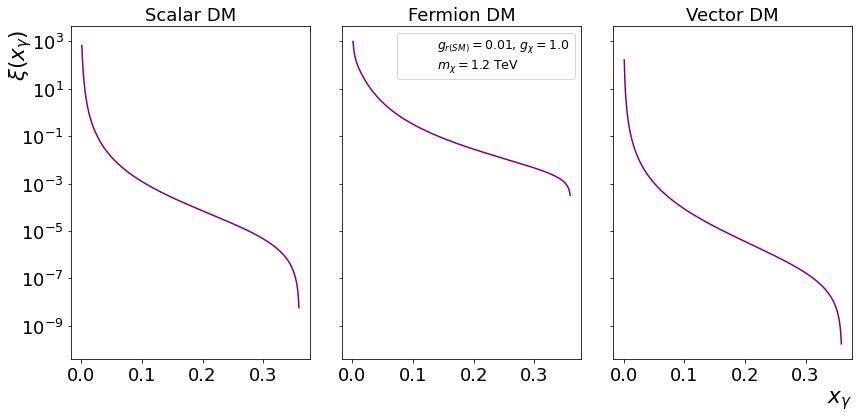

In [2]:
###########################     PARAMETERS     ##################################
binsize = 1000
#s_var = (np.arange(0.100, 5, 1/binsize))**2  # mediator mass [TeV]

gr = gl = gp.gr0 # variação do valor do acoplamento direito
gx = 1 # variação do valor do acoplamento escuro´

#xgamma = np.arange(0.01, 1, 1/binsize)
xgamma = np.arange(0.001, 1.01, 1/binsize)

mq = me ## electron mass 

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}
sig0qq = {}




for fignumber, dmname in enumerate(sig0.dmnames):
    
    if fignumber == 0:
        fig = plt.figure(figsize=(14, 6))

        ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                        nrows_ncols=(1,3),
                        axes_pad=(0.45, 0.0),
                        share_all=True,
                        #cbar_location="right",
                        #cbar_mode="single",
                        #cbar_size="5%",
                        #cbar_pad=0.10,
                        aspect=False
                        )

    xg = 0
    #No ISR xsec
    #ax[fignumber].plot(s_var, SFV(dmname).sig0(xg, s_var**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, label=r'SM (')    

    ## ee - noisr
    #ax[fignumber].plot(xgamma, SFV(dmname).sig0(xgamma, Mmed**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, linestyle='dashed', label=r'$\psi \bar \psi$ - Tree Process')
    
    ## ee - ISR
    ax[fignumber].plot(xgamma, hp.integrandxi(xgamma, Mmed**2, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0), color='purple', linewidth=1.5) #label=r'$\psi \bar \psi \to \gamma Z^{\prime}\to \gamma \chi \chi $')
    





    ######################################################################################################
    # pp
    #define pdf
    # PDF_sets = ['CT10', 'NNPDF31_lo_as_0118', 'CT18NLO', 'MMHT2014lo68cl', 'PDF4LHC15_nlo_100']
    # pdf = lhapdf.mkPDF(PDF_sets[1], 0)

    # ###### no ISR
    # sig0qq[f'{dmname}'] = SFV(dmname).sig0(xgamma, Mmed**2, mq, Mmed, mx, gr, gl, gx)
    # sigmazqqNOISR[f'{dmname}'] = dsigdM2_ISR(pdf, s_max, Mmed**2/s_max, Mmed, 1, mx, gr, gr, gx, sig0qq[f'{dmname}'])
    # sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)

    # ax[fignumber].plot(xgamma, sigmazqqNOISR[f'{dmname}']*brn, linewidth=1.0, linestyle='dashed', label=r'$pp$ - Tree Process')
    

    # ######qq - ISR
    # sighat_hphoton[f'{dmname}'] = dsigdgammaHP_deltaonly2(xgamma, Mmed**2, mvec[0], Mmed, mx, gr, gr, gx, sig0funcs)
    # sigmazqqISR[f'{dmname}'] = dsigdM2_ISR(pdf, s_max, Mmed**2/s_max, Mmed, 1, mx, gr, gr, gx, sighat_hphoton[f'{dmname}'])
    # sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)
    
    # ax[fignumber].plot(xgamma, sigmazqqISR[f'{dmname}']*brn, linewidth=1.0,  label=r'$pp$ - ISR emission')
    
    
    ## Plot Labels ##
    fig.set_dpi(72)
    ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels
    textstr = '\n'.join((
        r'$g_{r(SM)}=%1.2f$, $g_{\chi}=%1.1f$' % (gr, gx,),
        f'$m_\chi = {round(mx, 5)}$ TeV'))


    if fignumber == 1:
        ac, = ax[fignumber].plot([], [], label=textstr, color = 'None')

    # plot legend
    LEG =  ax[1].legend(loc='upper right', fontsize = fsize-5.5)

    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
    if fignumber == 1:
        extents = np.array([a.get_position().extents for a in ax])  #all axes extents
        bigextents = np.empty(4)   
        bigextents[:2] = extents[:,:2].min(axis=0)
        bigextents[2:] = extents[:,2:].max(axis=0)

        #text to mimic the x and y label. The text is positioned in the middle 
        labelpad=0.02  #distance between the external axis and the text
        xlab_t = fig.text(bigextents[2], bigextents[1]-0.12,r'$ x_{\gamma}$',
            horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
        ylab_t = fig.text( bigextents[0]*0.6, bigextents[0]*7,r'$\xi(x_{\gamma})$',
            rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

    if fignumber == 1:
        fig.set_dpi(72)
        fig.savefig(f'../figures/{today}/3a-xi-function.pdf', dpi=72, bbox_inches = "tight")

fig.show()
################################################################################

### dtot' / dtot (oneplusdelta)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_10575/309485082.py:117: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


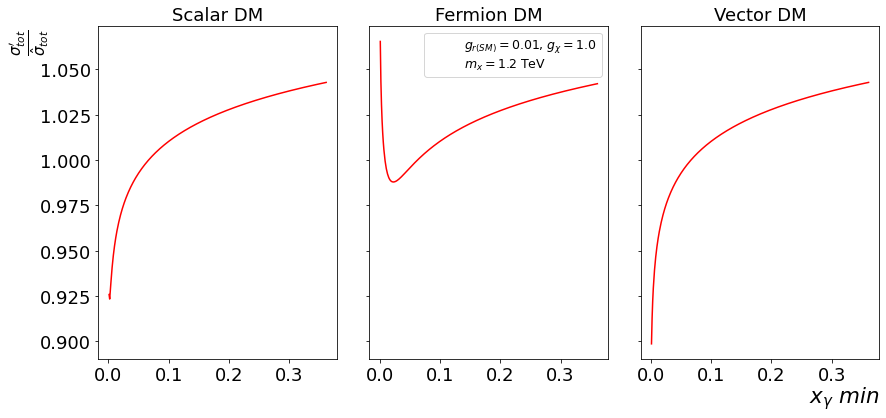

In [2]:
###########################     PARAMETERS     ##################################
binsize = 1000
#s_var = (np.arange(0.100, 5, 1/binsize))**2  # mediator mass [TeV]

gr = gl = gp.gr0 # variação do valor do acoplamento direito
gx = gp.gx0 # variação do valor do acoplamento escuro´


#xgamma = np.arange(0.01, 1, 1/binsize)
xgamma = np.arange(0.001, 1.01, 1/binsize)

mq = me ## electron mass 

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}
sig0qq = {}


for fignumber, dmname in enumerate(sig0.dmnames):
    
    if fignumber == 0:
        fig = plt.figure(figsize=(14, 6))

        ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                        nrows_ncols=(1,3),
                        axes_pad=(0.45, 0.0),
                        share_all=True,
                        #cbar_location="right",
                        #cbar_mode="single",
                        #cbar_size="5%",
                        #cbar_pad=0.10,
                        aspect=False
                        )

    xg = 0

    #No ISR xsec
    #ax[fignumber].plot(s_var, SFV(dmname).sig0(xg, s_var**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, label=r'SM (')    

    ## ee - noisr
    #ax[fignumber].plot(xgamma, SFV(dmname).sig0(xgamma, Mmed**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, linestyle='dashed', label=r'$\psi \bar \psi$ - Tree Process')
    
    ## ee - ISR
    ax[fignumber].plot(xgamma, hp.deltaonly(xgamma, (0.10 * Mmed) / np.sqrt(smax), smax, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0), linewidth=1.5, color='red') #label=r'$\psi \bar \psi \to \gamma Z^{\prime}\to \gamma \chi \chi $')
    





    ######################################################################################################
    # pp
    #define pdf
    #PDF_sets = ['CT10', 'NNPDF31_lo_as_0118', 'CT18NLO', 'MMHT2014lo68cl', 'PDF4LHC15_nlo_100']
    #pdf = lhapdf.mkPDF(PDF_sets[1], 0)

    ###### no ISR
    #sig0qq[f'{dmname}'] = SFV(dmname).sig0(xgamma, Mmed**2, mq, Mmed, mx, gr, gl, gx)
    #sigmazqqNOISR[f'{dmname}'] = dsigdM2_ISR(pdf, s_max, Mmed**2/s_max, Mmed, 1, mx, gr, gr, gx, sig0qq[f'{dmname}'])
    #sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)

    #ax[fignumber].plot(xgamma, sigmazqqNOISR[f'{dmname}']*brn, linewidth=1.0, linestyle='dashed', label=r'$pp$ - Tree Process')
    

    ######qq - ISR
    #sighat_hphoton[f'{dmname}'] = dsigdgammaHP(xgamma, Mmed**2, mvec[0], Mmed, mx, gr, gr, gx, sig0funcs)
    #sigmazqqISR[f'{dmname}'] = dsigdM2_ISR(pdf, s_max, Mmed**2/s_max, Mmed, 1, mx, gr, gr, gx, sighat_hphoton[f'{dmname}'])
    #sigmazqqNOISR[f'{dmname}'] = np.array(list(sigmazqqNOISR[f'{dmname}'][:]), dtype=np.float)
    
    #ax[fignumber].plot(xgamma, sigmazqqISR[f'{dmname}']*brn, linewidth=1.0,  label=r'$pp$ - ISR emission')
    
    
    ## Plot Labels ##
    fig.set_dpi(72)
    #ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels
    textstr = '\n'.join((
        r'$g_{r(SM)}=%1.2f$, $g_{\chi}=%1.1f$' % (gr, gx,),
        f'$m_x = {round(mx, 5) }$ TeV'))


    if fignumber == 1:
        ac, = ax[fignumber].plot([], [], label=textstr, color = 'None')

    # plot legend
    LEG =  ax[1].legend(loc='upper right', fontsize = fsize-5.5)

    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
    if fignumber == 1:
        extents = np.array([a.get_position().extents for a in ax])  #all axes extents
        bigextents = np.empty(4)   
        bigextents[:2] = extents[:,:2].min(axis=0)
        bigextents[2:] = extents[:,2:].max(axis=0)

        #text to mimic the x and y label. The text is positioned in the middle 
        labelpad=0.02  #distance between the external axis and the text
        xlab_t = fig.text(bigextents[2], bigextents[1]-0.12,r'$x_\gamma~min$',
            horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
        ylab_t = fig.text( bigextents[0]*0.45, bigextents[0]*7,r'$\frac{\sigma^{\prime}_{tot}}{\hat \sigma_{tot}}$',
            rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

    if fignumber == 1:
        fig.set_dpi(72)
        fig.savefig(f'../figures/{today}/3b-1plusdelta-SFV.pdf', dpi=72, bbox_inches = "tight")

fig.show()
################################################################################

### dsig /dxgamma

/tmp/ipykernel_10575/4208964992.py:92: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


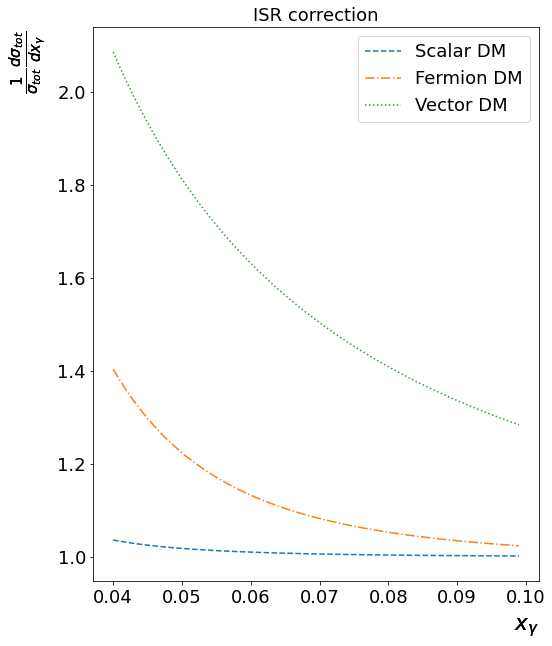

In [3]:
###########################     PARAMETERS     ##################################
binsize = 1000
s_var = (np.arange(0.100, 5, 1/binsize))**2  # mediator mass [TeV]
mx = 0.001 # DM mass [TeV]

gr = gl = gp.gr0 # variação do valor do acoplamento direito
gx = gp.gx0 # variação do valor do acoplamento escuro´

#xgamma = np.arange(0.010, 0.100, 1/binsize)
xgamma = np.arange(0.04, 0.100, 1/binsize)

mq = me ## electron mass 

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}
sighat_hphoton_xg = {}
sig0qq = {}


fig = plt.figure(figsize=(8, 10))

ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                nrows_ncols=(1,1),
                axes_pad=(0.45, 0.0),
                share_all=True,
                #cbar_location="right",
                #cbar_mode="single",
                #cbar_size="5%",aq
                #cbar_pad=0.10,
                aspect=False
                )
mdict = {'Scalar':'--', 'Fermion':'-.', 'Vector':':'}
for fignumber, dmname in enumerate(sig0.dmnames):
    fignumber = 0


    xg = 0



    ratiodsig = hp.dsigmadxgamma(xgamma, Mmed**2, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0) / hp.HPhsig(Mmed**2, mq, Mmed, mx, gr, gl, gx, sig0.SFV(dmname).sig0)

    
    ax[fignumber].plot(xgamma, ratiodsig, linestyle=mdict[dmname] , linewidth=1.5, label=f'{dmname} DM')
    

    
    ## Plot Labels ##
    fig.set_dpi(72)
    #ax[fignumber].set_yscale('log')
    ax[fignumber].set_title(r'ISR correction', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels
    textstr = '\n'.join((
        r'$g_{r(SM)}=%1.2f$, $g_{\chi}=%1.1f$' % (gr, gx,),
        f'$m_x = {mx}$ TeV'))


    if fignumber == 2:
        ac, = ax[fignumber].plot([], [], label=textstr, color = 'None')

    # plot legend
    #LEG =  ax[2].legend(loc='upper right', fontsize = fsize-5.5)
    ax[0].legend(loc='upper right', fontsize = fsize)
    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
#if fignumber == 2:
    extents = np.array([a.get_position().extents for a in ax])  #all axes extents
    bigextents = np.empty(4)   
    bigextents[:2] = extents[:,:2].min(axis=0)
    bigextents[2:] = extents[:,2:].max(axis=0)

    #text to mimic the x and y label. The text is positioned in the middle 
    labelpad=0.02  #distance between the external axis and the text
    xlab_t = fig.text(bigextents[2], bigextents[1]-0.08,r'$ x_{\gamma}$',
        horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
    ylab_t = fig.text( bigextents[0]*0.1, bigextents[0]*7,r'$\frac{1}{\sigma_{tot}} \frac{d \sigma_{tot}}{dx_{\gamma}}$',
        rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)

#if fignumber == 2:
    fig.set_dpi(72)
    fig.savefig(f'../figures/{today}/9-dsigmadxg-SFV.pdf', dpi=72, bbox_inches = "tight")

fig.show()
################################################################################

---

# Distribuição Relic Gondolo

/home/marcio/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/mnt/c/Users/Marcio/GDriveMarcio/_codigos/new-codes-quali/notebooks/models/relic_density_calc.py:53: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = quad(imag_func, a, b, **kwargs)
/mnt/c/Users/Marcio/GDriveMarcio/_codigos/new-codes-quali/notebooks/models/relic_density_calc.py:53: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  imag_integral = quad(imag_func, a, b, **kwargs)
/home/marcio/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/mnt/c/Users/Marcio/GDriveMarcio/_codigos/new-codes-quali/notebooks/models/relic_density_calc.py:52: IntegrationWarning: The integral is probably divergent, or slow

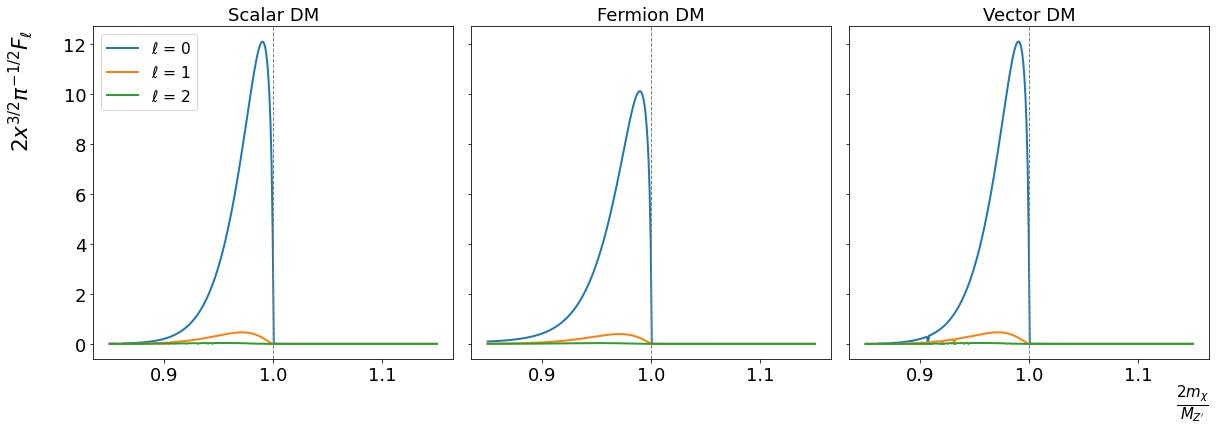

In [2]:
###########################     PARAMETERS     ##################################
binsize = 300
s_var = (np.linspace(0.85*(Mmed), 1.15*(Mmed), binsize))**2

################################################################################
fsize = 18
# Set up figure and image grid
sigmazqqISR = {}
sighat_hphoton = {}
sigmazqqNOISR = {}
sigmazeeNOISR = {}
sigmazeeISR = {}




for fignumber, dmname in enumerate(sig0.dmnames):
    if fignumber == 0:
        fig = plt.figure(figsize=(20, 6))

        ax = ImageGrid(fig, 111,          # as in plt.subplot(111)
                        nrows_ncols=(1,3),
                        axes_pad=(0.25, 0.0),
                        share_all=True,
                        #cbar_location="right",
                        #cbar_mode="single",
                        #cbar_size="5%",
                        #cbar_pad=0.10,
                        aspect=False
                        )

    xg = 0

    #No ISR xsec
    #ax[fignumber].plot(s_var, SFV(dmname).sig0(xg, s_var**2, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, label=r'SM (')    
    
    # ## ee
    # ax[fignumber].plot(np.sqrt(s_var), SFV(dmname).sig0(xg, s_var, mq, Mmed, mx, gr, gl, gx)*brn, linewidth=1.0, label=r'$e^{+}e^{-}$ - Tree Process')
    
    # ## ee - ISR
    #ax[fignumber].plot((np.sqrt(s_var)/Mmed), sigmav_gon((mx/25), s_var, mq, Mmed, np.sqrt(s_var)/2, gr, gl, gx, dmname), linewidth=1.0, label=r'Sigmav Gondolo')
    for l  in [0, 1, 2]:
        ax[fignumber].plot((np.sqrt(s_var)/Mmed), ohm.sigmav_gondolo(((np.sqrt(s_var+0j)/2)/25)+0j, Mmed+0j, me+0j, Mmed+0j, np.sqrt(s_var+0j)/2, gr0+0j, gl0+0j, gx0+0j, dmname, 0.15, l), linewidth=2.0, label=fr'$\ell$ = {l}')

    
    ## Plot Labels ##
    fig.set_dpi(72)
    #ax[fignumber].set_yscale('log')
    ax[fignumber].axvline(x=1, linewidth=1.0, linestyle='dashed',color='gray')
    ax[fignumber].set_title(f'{dmname} DM', fontsize = fsize)
    ax[fignumber].tick_params(axis="x", labelsize=fsize)
    ax[0].tick_params(axis="y", labelsize=fsize)
    # More labels
    # More labels
    #textstr = '\n'.join(
    #    r'$g_{r(SM)}=%1.2f$, $g_{\chi}=%1.1f$' % (gr, gx,))
        #f'$m_x = {mx}$ TeV'))

    #ax[fignumber].set_ylim(0, 25)
    #if fignumber == 0:
    #    ac, = ax[fignumber].plot([], [], label=textstr, color = 'None')

    # plot legend
    

    ## TEXT BELLOW THE LABELS ##
    #get the extent of the largest box containing all the axes/subplots
    if fignumber == 1:
        extents = np.array([a.get_position().extents for a in ax])  #all axes extents
        bigextents = np.empty(4)   
        bigextents[:2] = extents[:,:2].min(axis=0)
        bigextents[2:] = extents[:,2:].max(axis=0)

        #text to mimic the x and y label. The text is positioned in the middle 
        labelpad=0.02  #distance between the external axis and the text
        xlab_t = fig.text(bigextents[2], bigextents[1]-0.15,r'$ \frac{2 m_{\chi}}{M_{Z^{\prime}}}$',
            horizontalalignment='right', verticalalignment = 'bottom', size = fsize+3.5)
        ylab_t = fig.text( bigextents[0]*0.6, bigextents[0]*7,r'$ 2x^{3/2} \pi^{-1/2} F_{\ell}  $',
            rotation='vertical', horizontalalignment = 'center', verticalalignment = 'top', size = fsize+3.5)
    
    LEG =  ax[0].legend(loc='upper left', fontsize = fsize-2.5)
#2x^{3/2} \pi^{-1/2} F_l 
    if fignumber == 1:
        fig.set_dpi(72)
        fig.savefig(f'../figures/{today}/4-profile.pdf', dpi=72, bbox_inches = "tight")

fig.show()
################################################################################